# Kuchambua Makala za COVID-19

Katika changamoto hii, tutaendelea na mada ya janga la COVID, na kuzingatia uchakataji wa makala za kisayansi kuhusu mada hii. Kuna [Dataset ya CORD-19](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) yenye zaidi ya makala 7000 (wakati wa kuandika) kuhusu COVID, inayopatikana pamoja na metadata na muhtasari (na kwa takriban nusu ya makala hizo, maandishi kamili yanapatikana pia).

Mfano kamili wa kuchambua dataset hii kwa kutumia huduma ya kiakili ya [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) umeelezewa [katika chapisho hili la blogu](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/). Tutajadili toleo lililorahisishwa la uchambuzi huu.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Kupata Data

Kwanza, tunahitaji kupata metadata ya makala za CORD ambazo tutafanya kazi nazo.

**NOTE**: Hatutoi nakala ya seti ya data kama sehemu ya hazina hii. Huenda ukahitaji kwanza kupakua faili [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) kutoka [seti hii ya data kwenye Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge). Usajili na Kaggle unaweza kuhitajika. Pia unaweza kupakua seti ya data bila usajili [kutoka hapa](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html), lakini itajumuisha maandishi yote kamili pamoja na faili ya metadata.

Tutajaribu kupata data moja kwa moja kutoka kwa chanzo cha mtandaoni, hata hivyo, ikiwa itashindikana, unahitaji kupakua data kama ilivyoelezwa hapo juu. Pia, inafaa kupakua data ikiwa unapanga kuifanyia majaribio zaidi, ili kuokoa muda wa kusubiri.

> **NOTE** kwamba seti ya data ni kubwa sana, takriban 1 Gb kwa ukubwa, na mstari ufuatao wa msimbo unaweza kuchukua muda mrefu kukamilika! (~dakika 5)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

Sasa tutabadilisha safu ya tarehe ya kuchapishwa kuwa `datetime`, na kuchora histogramu ili kuona wigo wa tarehe za kuchapishwa.


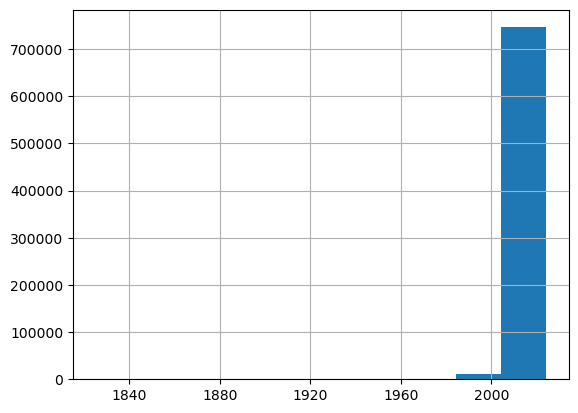

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## Uchimbaji wa Data Iliyopangiliwa

Hebu tuone ni aina gani ya taarifa tunaweza kutoa kwa urahisi kutoka kwa muhtasari. Jambo moja ambalo tunaweza kuwa na nia nalo ni kuona ni mikakati gani ya matibabu iliyopo, na jinsi ilivyobadilika kwa muda. Kwanza kabisa, tunaweza kuandaa kwa mkono orodha ya dawa zinazowezekana zinazotumika kutibu COVID, pamoja na orodha ya uchunguzi wa magonjwa. Kisha tunapitia orodha hizo na kutafuta maneno yanayolingana katika muhtasari wa makala.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


Tumeongeza safu nyingi kwenye dataframe yetu ambazo zinaonyesha idadi ya mara dawa/utambuzi fulani unapatikana kwenye muhtasari.

> **Kumbuka** kwamba tunaongeza nafasi mwanzoni mwa neno tunapofanya utafutaji wa sehemu ya maandishi. Tukiacha kufanya hivyo, tunaweza kupata matokeo yasiyo sahihi, kwa sababu *chloroquine* pia inaweza kupatikana ndani ya sehemu ya maandishi *hydroxychloroquine*. Pia, tunalazimisha safu ya muhtasari kubadilishwa kuwa `str` ili kuepuka hitilafu - jaribu kuondoa `str` na uone kinachotokea.

Ili kurahisisha kazi na data, tunaweza kutoa sehemu ndogo ya fremu yenye hesabu za dawa pekee, na kuhesabu idadi ya mara zilizojumlishwa. Hii inatupa dawa maarufu zaidi:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

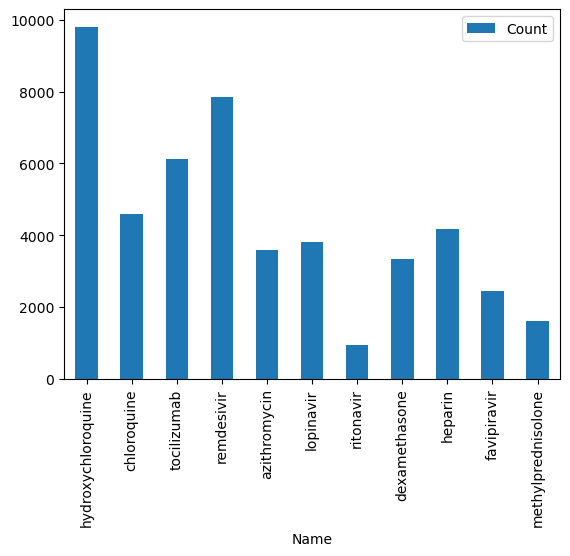

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## Kutafuta Mwelekeo katika Mkakati wa Matibabu

Katika mfano hapo juu tumefanya `sum` ya thamani zote, lakini tunaweza pia kufanya hivyo kwa msingi wa kila mwezi:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

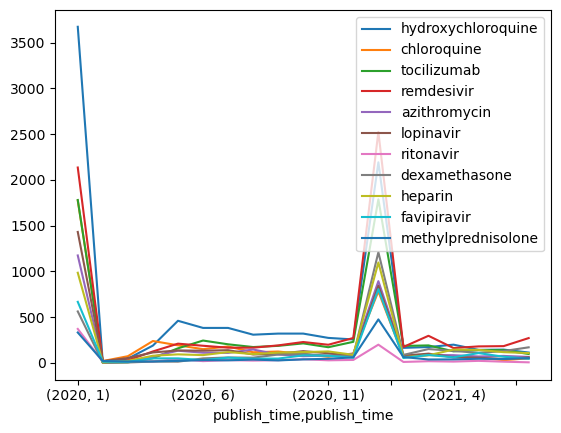

In [152]:
dfmt.plot()
plt.show()

Uchunguzi wa kuvutia ni kwamba tuna ongezeko kubwa katika maeneo mawili: Januari, 2020 na Januari, 2021. Hii inasababishwa na ukweli kwamba baadhi ya makala hazina tarehe ya kuchapishwa iliyoainishwa wazi, na hivyo zinawekwa kama Januari ya mwaka husika.

Ili kuelewa data vizuri zaidi, hebu tuonyeshe tu dawa chache. Pia tutafuta data ya Januari, na kuijaza kwa thamani ya wastani, ili kupata mchoro mzuri zaidi:


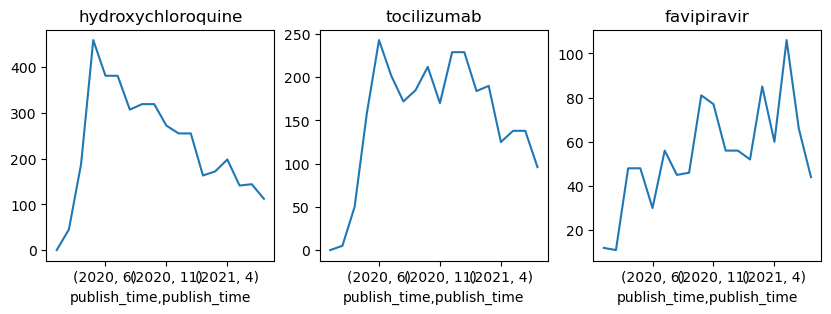

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

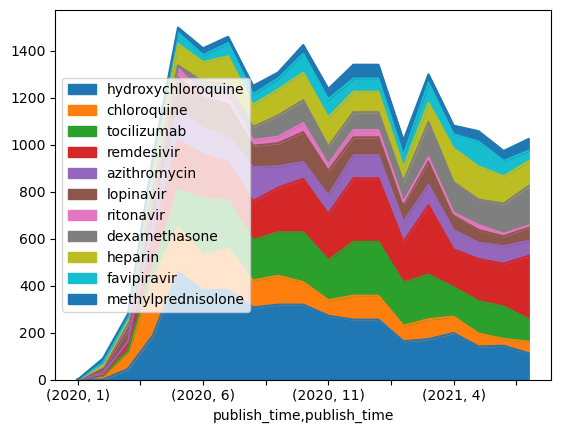

In [154]:
dfmt.plot.area()
plt.show()

Hata zaidi, tunaweza kuhesabu umaarufu wa jamaa kwa asilimia:


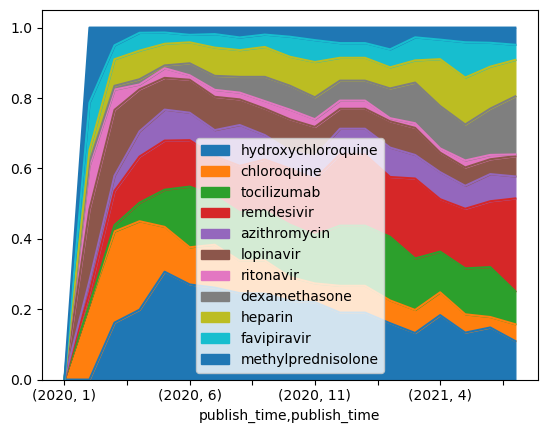

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## Kuhesabu Ulinganifu wa Tiba na Utambuzi

Moja ya mahusiano ya kuvutia tunayoweza kuchunguza ni jinsi utambuzi tofauti unavyotibiwa kwa dawa tofauti. Ili kuweza kuonyesha hili, tunahitaji kuhesabu **ramani ya marudio ya pamoja**, ambayo itaonyesha mara ngapi maneno mawili yanatajwa katika karatasi moja.

Ramani kama hiyo kimsingi ni matriki ya 2D, ambayo inawakilishwa vyema na **numpy array**. Tutahesabu ramani hii kwa kupitia maandiko yote ya muhtasari, na kuweka alama kwa vyombo vinavyotokea humo:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

Moja ya njia za kuonyesha matriki hii ni kuchora **ramani ya joto**:


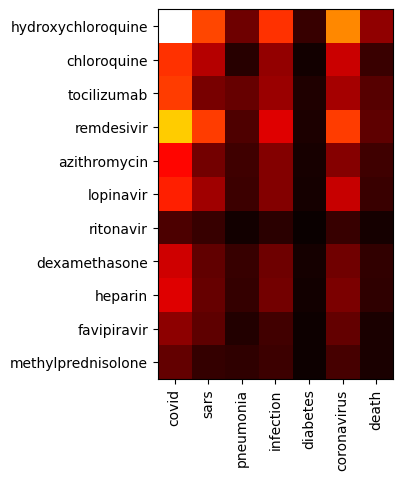

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

Hata hivyo, uwasilishaji bora zaidi unaweza kufanyika kwa kutumia mchoro unaoitwa **Sankey**! `matplotlib` haina msaada wa moja kwa moja kwa aina hii ya mchoro, kwa hivyo tutahitaji kutumia [Plotly](https://plotly.com/python/) kama ilivyoelezwa [katika mafunzo haya](https://plotly.com/python/sankey-diagram/).

Ili kutengeneza mchoro wa sankey kwa kutumia plotly, tunahitaji kujenga orodha zifuatazo:
* Orodha `all_nodes` ya nodi zote kwenye grafu, ambayo itajumuisha dawa na uchunguzi
* Orodha ya fahirisi za chanzo na lengo - orodha hizi zitaonyesha ni nodi zipi zinaenda upande wa kushoto, na zipi zinaenda upande wa kulia wa mchoro
* Orodha ya viungo vyote, kila kiungo kikijumuisha:
   - Fahirisi ya chanzo katika safu ya `all_nodes`
   - Fahirisi ya lengo
   - Thamani inayoonyesha nguvu ya kiungo. Hii ni hasa thamani kutoka kwenye matriki yetu ya ushirikiano.
   - Rangi ya kiungo kwa hiari. Tutatoa chaguo la kuangazia baadhi ya maneno kwa uwazi zaidi

Msimbo wa jumla wa kuchora mchoro wa sankey umeandaliwa kama kazi tofauti `sankey`, ambayo inachukua orodha mbili (kategoria za chanzo na lengo) na matriki ya ushirikiano. Pia inaturuhusu kubainisha kizingiti, na kuondoa viungo vyote ambavyo ni dhaifu kuliko kizingiti hicho - hii hufanya mchoro kuwa rahisi kidogo.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## Hitimisho

Umeona kwamba tunaweza kutumia mbinu rahisi sana kutoa taarifa kutoka kwa vyanzo vya data visivyo na muundo, kama vile maandishi. Katika mfano huu, tumetumia orodha iliyopo ya dawa, lakini ingekuwa na nguvu zaidi kutumia mbinu za usindikaji wa lugha asilia (NLP) kufanya uchimbaji wa viashiria kutoka kwa maandishi. Katika [makala hii ya blogu](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) tunaelezea jinsi ya kutumia huduma za wingu kwa uchimbaji wa viashiria. Chaguo jingine lingekuwa kutumia maktaba za Python za NLP kama [NLTK](https://www.nltk.org/) - mbinu ya kutoa taarifa kutoka kwa maandishi kwa kutumia NLTK imeelezewa [hapa](https://www.nltk.org/book/ch07.html).


## Changamoto

Endelea kuchunguza data za makala za COVID kwa njia zifuatazo:

1. Tengeneza matriki ya mchanganyiko wa dawa tofauti, na uone ni dawa zipi mara nyingi hutajwa pamoja (yaani, zimetajwa katika muhtasari mmoja). Unaweza kurekebisha msimbo wa kutengeneza matriki ya mchanganyiko wa dawa na magonjwa.
1. Onyesha matriki hii kwa kutumia ramani ya joto (heatmap).
1. Kama lengo la ziada, unaweza kutaka kuonyesha mchanganyiko wa dawa kwa kutumia [chord diagram](https://en.wikipedia.org/wiki/Chord_diagram). [Maktaba hii](https://pypi.org/project/chord/) inaweza kukusaidia kuchora chord diagram.
1. Kama lengo jingine la ziada, jaribu kutoa kipimo cha dozi za dawa tofauti (kama vile **400mg** katika *chukua 400mg ya chloroquine kila siku*) kwa kutumia regular expressions, na tengeneza dataframe inayoonyesha dozi tofauti za dawa tofauti. **Kumbuka**: zingatia thamani za nambari ambazo ziko karibu na jina la dawa katika maandishi.



---

**Kanusho**:  
Hati hii imetafsiriwa kwa kutumia huduma ya tafsiri ya AI [Co-op Translator](https://github.com/Azure/co-op-translator). Ingawa tunajitahidi kwa usahihi, tafadhali fahamu kuwa tafsiri za kiotomatiki zinaweza kuwa na makosa au kutokuwa sahihi. Hati ya asili katika lugha yake ya awali inapaswa kuzingatiwa kama chanzo cha mamlaka. Kwa taarifa muhimu, inashauriwa kutumia huduma ya tafsiri ya kitaalamu ya binadamu. Hatutawajibika kwa maelewano mabaya au tafsiri zisizo sahihi zinazotokana na matumizi ya tafsiri hii.
